In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import scipy.stats as stats
from sklearn import preprocessing

# Always make it pretty.
plt.style.use('seaborn-pastel')

%matplotlib inline
sns.set_style(style="whitegrid")

In [545]:
#establish groups, below and above median for income
us_median = 59039

#import dataframe
eda_df = pd.read_csv('../ignorefiles/eda_data.csv')

In [553]:
eda_df['REVENUE_AMT'].astype('int')

0           154543
1          6823299
2                0
3           883302
4                0
            ...   
1017126          0
1017127          0
1017128     225000
1017129          0
1017130          0
Name: REVENUE_AMT, Length: 1017131, dtype: int64

In [147]:
eda_df['REVENUE_AMT'].sort_values(ascending=False)

740028    58440.60
740027    28297.65
756435    13498.50
108896    11111.96
696468    10007.44
            ...   
555366      -20.13
332560      -32.52
5008        -56.82
182759      -61.47
926461     -134.69
Name: REVENUE_AMT, Length: 1017131, dtype: float64

## NP plots

,Unnamed: 0,STATE_x,zipcode,N1,N02650,A02650,avg_income,NAME,CITY,STATE_y,ZIP,SUBSECTION,CLASSIFICATION,FOUNDATION,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD
0,0,AK,99501,7740.0,7740.0,581650.0,75.148579,AFACT-ANCHORAGE FAITH & ACTION- CONGREGATIONS ...,ANCHORAGE,AK,99501-2409,3,7200,15,45396.0,154543.0,0.15,X012
1,1,AK,99501,7740.0,7740.0,581650.0,75.148579,COVENANT HOUSE ALASKA,ANCHORAGE,AK,99501-3625,3,1000,15,21108722.0,8763496.0,6.82,P300
2,2,AK,99501,7740.0,7740.0,581650.0,75.148579,HELPFUL HEARTS,ANCHORAGE,AK,99501-5791,3,1000,15,0.0,0.0,0.00,P11
3,3,AK,99501,7740.0,7740.0,581650.0,75.148579,ALASKA CORRECTIONAL OFFICERS ASSOCIATION INC,ANCHORAGE,AK,99501-2519,5,3000,0,1846516.0,915606.0,0.88,J40
4,4,AK,99501,7740.0,7740.0,581650.0,75.148579,SOBERMIUT REVIVING OUR SPIRIT INC,ANCHORAGE,AK,99501-5231,3,2000,15,0.0,0.0,0.00,X20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017126,1017126,WY,83128,950.0,950.0,89831.0,94.558947,ALPINE FOOD BANK,ALPINE,WY,83128-3921,3,1000,16,0.0,0.0,0.00,K31
1017127,1017127,WY,83128,950.0,950.0,89831.0,94.558947,AMERICAN LEGION,ALPINE,WY,83128-0662,19,1000,0,0.0,0.0,0.00,NaN
1017128,1017128,WY,83128,950.0,950.0,89831.0,94.558947,NORTHSTAR FOUNDATION,ALPINE,WY,83128-0274,3,1000,15,225000.0,225000.0,0.22,P99
1017129,1017129,WY,83128,950.0,950.0,89831.0,94.558947,TOP OF THE ROCKIES,ALPINE,WY,83128-0172,3,1000,16,0.0,0.0,0.00,S80


In [473]:
#establish df for plotting num of NPs per State > city > zip
#plot on folium density map
#number of NPs registered with IRS by state


# #dual axis bar plot (reformat values to show in millions)

count = eda_df.groupby('STATE_x').count()[['REVENUE_AMT']]
revs = eda_df.groupby('STATE_x').sum()[['REVENUE_AMT']]

combined = pd.merge(count,revs, left_index=True,right_index=True).sort_values(by='REVENUE_AMT_x', ascending=False)

combined.REVENUE_AMT_y = round(combined['REVENUE_AMT_y']/1000000,2)

def dual_axis_plot(df, y1, y2, title, y1label, y2label, xlabel,filename):
    """function to plot bar and line on dual y-axis."""
    fig, ax1 = plt.subplots(figsize=(12,6))

    ax2 = ax1.twinx()
    
    ax1.bar(df.index, y1,label='Count')
    ax1.set_xticklabels(df.index, rotation=90)
    ax1.set_xlabel(f'{xlabel}', size=12)
    ax1.set_ylabel(f'{y1label}', size=12)
    ax1.set_title(f'{title}', size=15)
    ax1.grid()
    
    ax2.bar(df.index, y2, color='gold', alpha=.3, width=.5, align='center', label='Revenues')
    ax2.set_ylabel(f'{y2label}')
    ax2.grid()
    fig.legend()
    plt.savefig(f'../images/{filename}.png')


    

In [259]:
eda_df.REVENUE_AMT.sum()

2201536349373.0

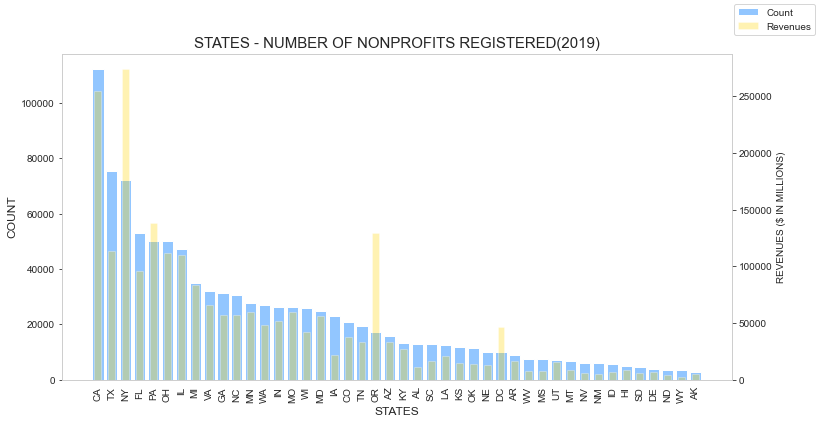

In [474]:
dual_axis_plot(combined, 
               combined['REVENUE_AMT_x'], 
               combined['REVENUE_AMT_y'],
              'STATES - NUMBER OF NONPROFITS REGISTERED(2019)',
              'COUNT',
              'REVENUES ($ IN MILLIONS)',
              'STATES',
              'num_nps')

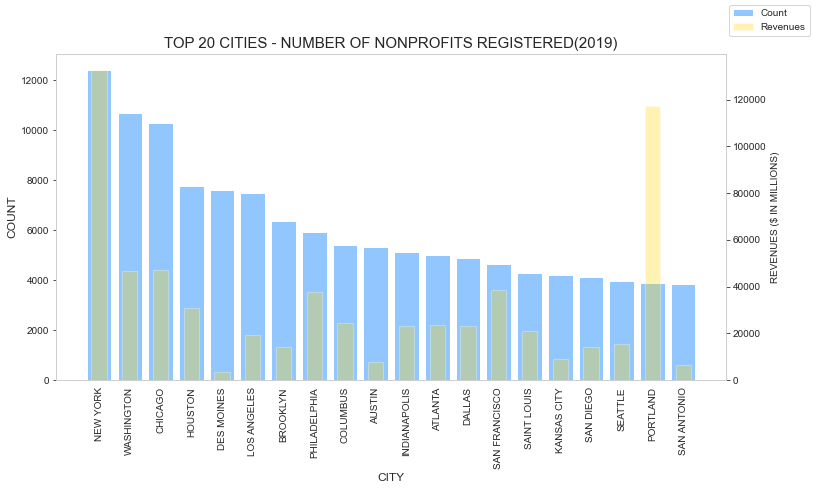

In [475]:
#establish df for plotting num of NPs per State > city > zip
#plot on folium density map
#number of NPs registered with IRS by city

count2 = eda_df.groupby('CITY').count()[['REVENUE_AMT']]
revs2 = eda_df.groupby('CITY').sum()[['REVENUE_AMT']]

combined2 = pd.merge(count2,revs2, left_index=True,right_index=True).nlargest(20, columns='REVENUE_AMT_x').sort_values(by='REVENUE_AMT_x', ascending=False)

combined2.REVENUE_AMT_y = round(combined2['REVENUE_AMT_y']/1000000,2)


dual_axis_plot(combined2, 
               combined2['REVENUE_AMT_x'], 
               combined2['REVENUE_AMT_y'],
              'TOP 20 CITIES - NUMBER OF NONPROFITS REGISTERED(2019)',
              'COUNT',
              'REVENUES ($ IN MILLIONS)',
              'CITY',
              'num_nps_city')

In [223]:

new_index = [ 3,  9,  4, 12,  6,  5, 14,  8,  7, 27, 13,  2, 19, 25, 29, 10,  1,
            17, 11, 18, 23, 26, 15, 91, 16, 82,  0, 50, 20]


index_list = []

for i in new_index:
    index_list.append(f'501(c){i}')


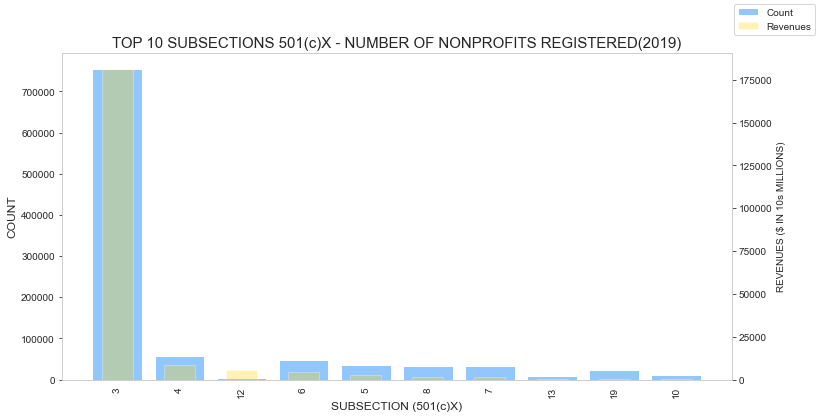

In [476]:
#nps by subsection, relevant because this will tell me 
#type of organization and if contributions are deductible
#deductible is not beind analyzed at this moment

#which subsection have the most NPs and where are they in the US


count3 = eda_df.groupby('SUBSECTION').count()[['REVENUE_AMT']]
revs3 = eda_df.groupby('SUBSECTION').sum()[['REVENUE_AMT']]

combined3 = pd.merge(count3,revs3, left_index=True,right_index=True).nlargest(10,columns='REVENUE_AMT_x').sort_values(by='REVENUE_AMT_y', ascending=False)

combined3.REVENUE_AMT_y = round(combined3['REVENUE_AMT_y']/10000000,2)

# combined3.index.astype('str', copy=False)
combined3.index = combined3.index.astype(str, copy=False)
dual_axis_plot(combined3, 
               combined3['REVENUE_AMT_x'], 
               combined3['REVENUE_AMT_y'],
              'TOP 10 SUBSECTIONS 501(c)X - NUMBER OF NONPROFITS REGISTERED(2019)',
              'COUNT',
              'REVENUES ($ IN 10s MILLIONS)',
              'SUBSECTION (501(c)X)',
              'num_nps_sub')

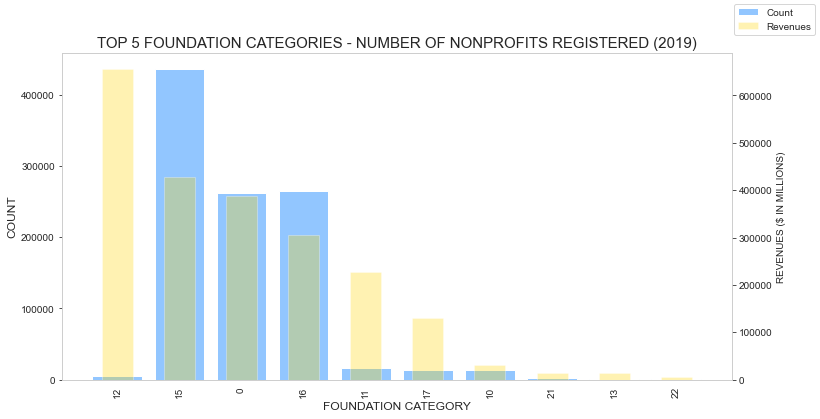

In [477]:
#nps by foundation, where they receive most of their funding

#which foundations have the most NPs and where are they in the US

count4 = eda_df.groupby('FOUNDATION').count()[['REVENUE_AMT']]
revs4 = eda_df.groupby('FOUNDATION').sum()[['REVENUE_AMT']]

combined4 = pd.merge(count4,revs4, left_index=True,right_index=True).nlargest(10,columns='REVENUE_AMT_y').sort_values(by='REVENUE_AMT_y', ascending=False)

combined4.REVENUE_AMT_y = round(combined4['REVENUE_AMT_y']/1000000,2)


combined4.index = combined4.index.astype(str, copy=False)

dual_axis_plot(combined4, 
               combined4['REVENUE_AMT_x'], 
               combined4['REVENUE_AMT_y'],
              'TOP 5 FOUNDATION CATEGORIES - NUMBER OF NONPROFITS REGISTERED (2019)',
              'COUNT',
              'REVENUES ($ IN MILLIONS)',
              'FOUNDATION CATEGORY',
              'num_nps_foun')

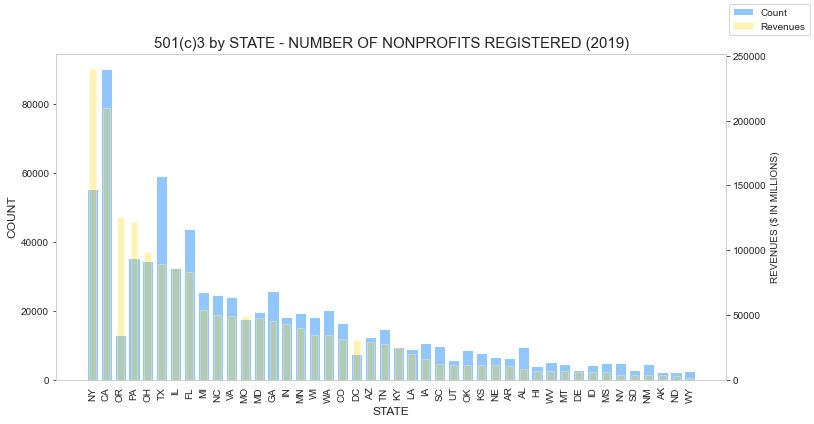

In [478]:
sub501c3 = eda_df[eda_df['SUBSECTION'] == 3]


count5 = sub501c3.groupby('STATE_x').count()[['REVENUE_AMT']]
revs5 = sub501c3.groupby('STATE_x').sum()[['REVENUE_AMT']]

combined5 = pd.merge(count5,revs5, left_index=True,right_index=True).sort_values(by='REVENUE_AMT_y', ascending=False)
#.nlargest(10,columns='REVENUE_AMT_y')
combined5.REVENUE_AMT_y = round(combined5['REVENUE_AMT_y']/1000000,2)


combined5.index = combined5.index.astype(str, copy=False)

dual_axis_plot(combined5, 
               combined5['REVENUE_AMT_x'], 
               combined5['REVENUE_AMT_y'],
              '501(c)3 by STATE - NUMBER OF NONPROFITS REGISTERED (2019)',
              'COUNT',
              'REVENUES ($ IN MILLIONS)',
              'STATE',
              'num_nps_3foun')

(array([2.4451e+04, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-4.22479000e+01,  1.25846489e+04,  2.52115457e+04,  3.78384426e+04,
         5.04653394e+04,  6.30922362e+04,  7.57191330e+04,  8.83460298e+04,
         1.00972927e+05,  1.13599823e+05,  1.26226720e+05]),
 <a list of 10 Patch objects>)

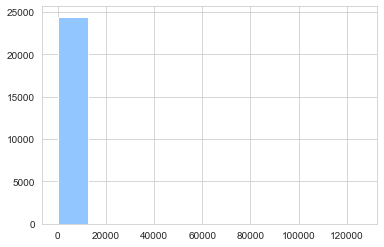

## Income Plots

In [334]:
#hist of income her state and/or zip


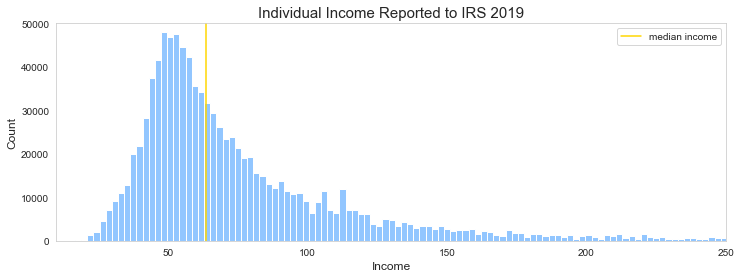

In [498]:
x = eda_df['avg_income']


plt.figure(figsize=(12,4))
plt.xlim(10, 250)
plt.ylim(0,50000)
plt.axvline(x.median(), color='gold', label='median income')
plt.hist(x, bins=1000)
plt.xlabel('Income', size=12)
plt.ylabel('Count', size=12)
plt.title('Individual Income Reported to IRS 2019', size=15)
plt.grid()
plt.legend()
plt.savefig('../images/hist_ind_income.png')

#pareto distribution which is very typical for income 80% pop only has 20% of wealth/income

In [13]:
#box blot of 

## NP vs. Income Plots

In [419]:
#scatter plot by foundation vs avg income...


# state = eda_df[eda_df['STATE_x']=='TX']
df = eda_df[['STATE_x','FOUNDATION','SUBSECTION','REVENUE_AMT','avg_income','zipcode']]

In [415]:
# state_lst = eda_df.STATE_x.unique()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017131 entries, 0 to 1017130
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   STATE_x      1017131 non-null  object 
 1   FOUNDATION   1017131 non-null  int64  
 2   SUBSECTION   1017131 non-null  int64  
 3   REVENUE_AMT  1017131 non-null  float64
 4   avg_income   1017131 non-null  float64
 5   zipcode      1017131 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 46.6+ MB


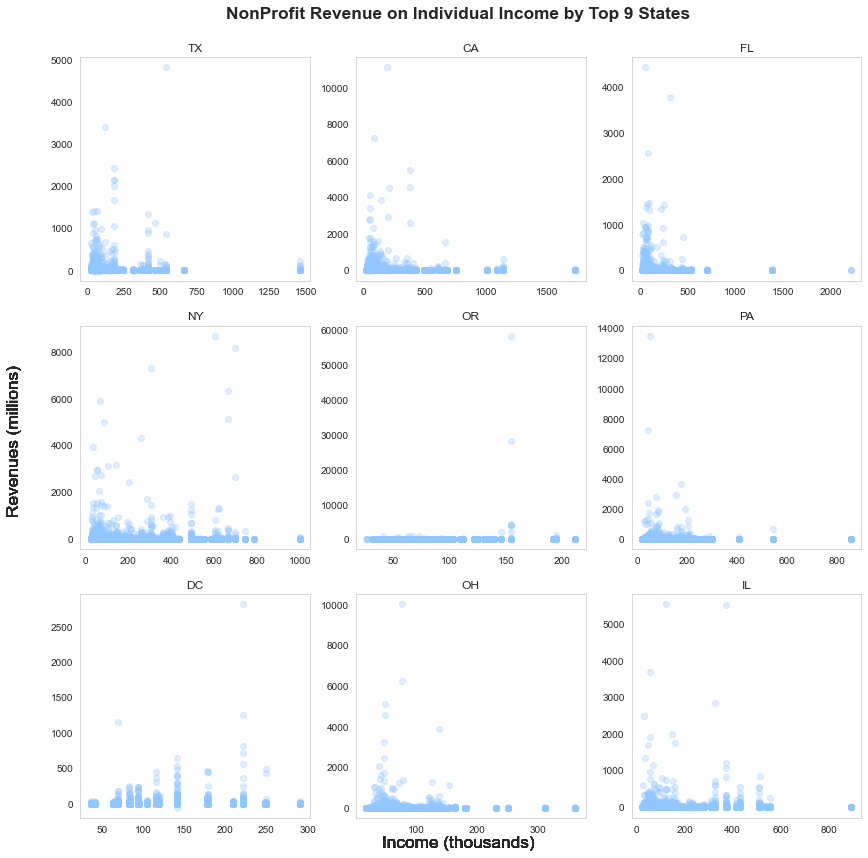

In [400]:

fig, axs = plt.subplots(3,3, figsize=(14,14))

test_state_lst = ['TX','CA','FL', 'NY', 'OR','PA','DC', 'OH','IL']

for i, axs in zip(test_state_lst, axs.flatten()):

    state = df[df['STATE_x']==f'{i}']
    
    x = state['avg_income']
    y = state['REVENUE_AMT']/1000000
    
    axs.scatter(x,y, alpha=.3)
    axs.set_title(f'{i}', size=12)
    axs.grid()
    fig.tight_layout
    fig.suptitle('NonProfit Revenue on Individual Income by Top 9 States', y=0.93,
                 size='xx-large', weight='bold',
                 stretch='expanded')
    fig.text(0.5, 0.1, 'Income (thousands)', ha='center', va='center',
             size='xx-large', stretch='semi-expanded')
    fig.text(0.06, 0.5, 'Revenues (millions)', ha='center', va='center',
             rotation='vertical', size='xx-large',
             stretch='semi-expanded')
    plt.savefig('../images/rev_on_inc_scatter.png')


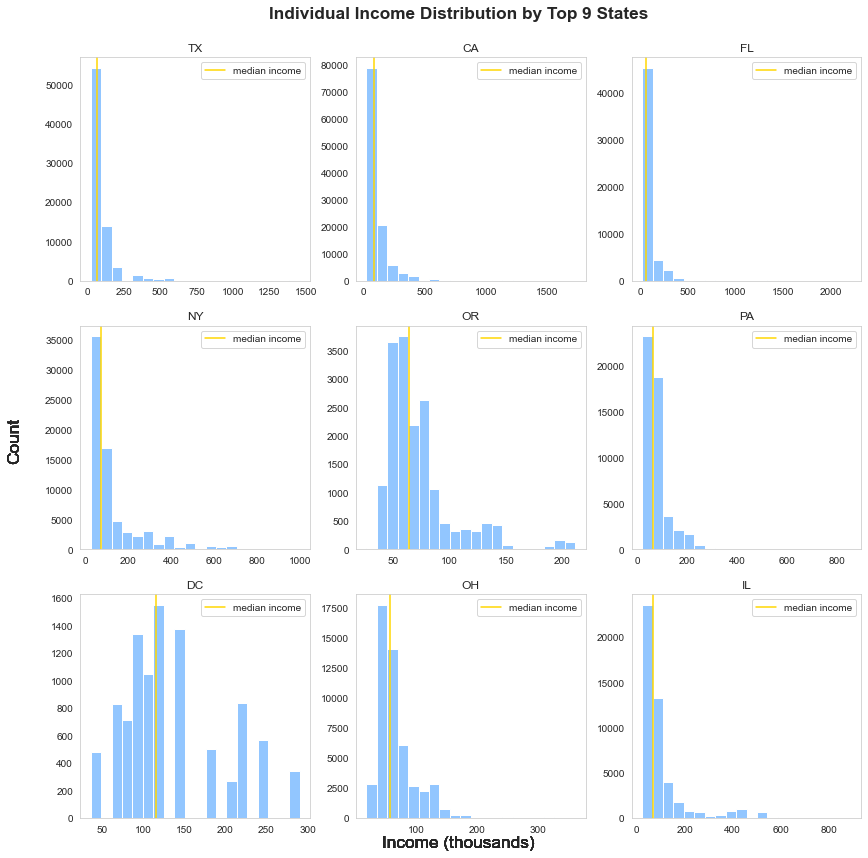

In [432]:
fig, axs = plt.subplots(3,3, figsize=(14,14))

test_state_lst = ['TX','CA','FL', 'NY', 'OR','PA','DC', 'OH','IL']

for i, axs in zip(test_state_lst, axs.flatten()):

    state = df[df['STATE_x']==f'{i}']
    
    x = state['avg_income']
#     y = state['REVENUE_AMT']/1000000
    
    axs.hist(x,bins=20)
    axs.axvline(x.median(), color='gold', label='median income')
    axs.set_title(f'{i}', size=12)
    axs.grid()
    axs.legend()
    fig.tight_layout
    fig.suptitle('Individual Income Distribution by Top 9 States', y=0.93,
                 size='xx-large', weight='bold',
                 stretch='expanded')
    fig.text(0.5, 0.1, 'Income (thousands)', ha='center', va='center',
             size='xx-large', stretch='semi-expanded')
    fig.text(0.06, 0.5, 'Count', ha='center', va='center',
             rotation='vertical', size='xx-large',
             stretch='semi-expanded')
    plt.savefig('../images/state_inc_hist.png')


    

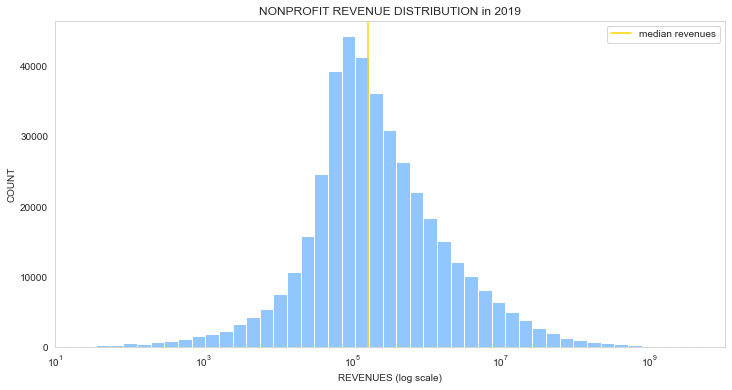

<Figure size 432x288 with 0 Axes>

In [501]:
revs = eda_df[eda_df['REVENUE_AMT'] > 0]['REVENUE_AMT'].sort_values(ascending=False)

# revmed = revs.median

x = np.logspace(1,10)

plt.figure(figsize=(12,6))
plt.hist(revs, bins=x)
plt.axvline(revs.median(), color='gold', label='median revenues')
plt.xlim(10,)
plt.xscale('log')
plt.title('NONPROFIT REVENUE DISTRIBUTION in 2019')
plt.ylabel('COUNT')
plt.xlabel('REVENUES (log scale)')
plt.legend()
plt.grid()
plt.show()
plt.savefig('../images/np_rev_dist.png');

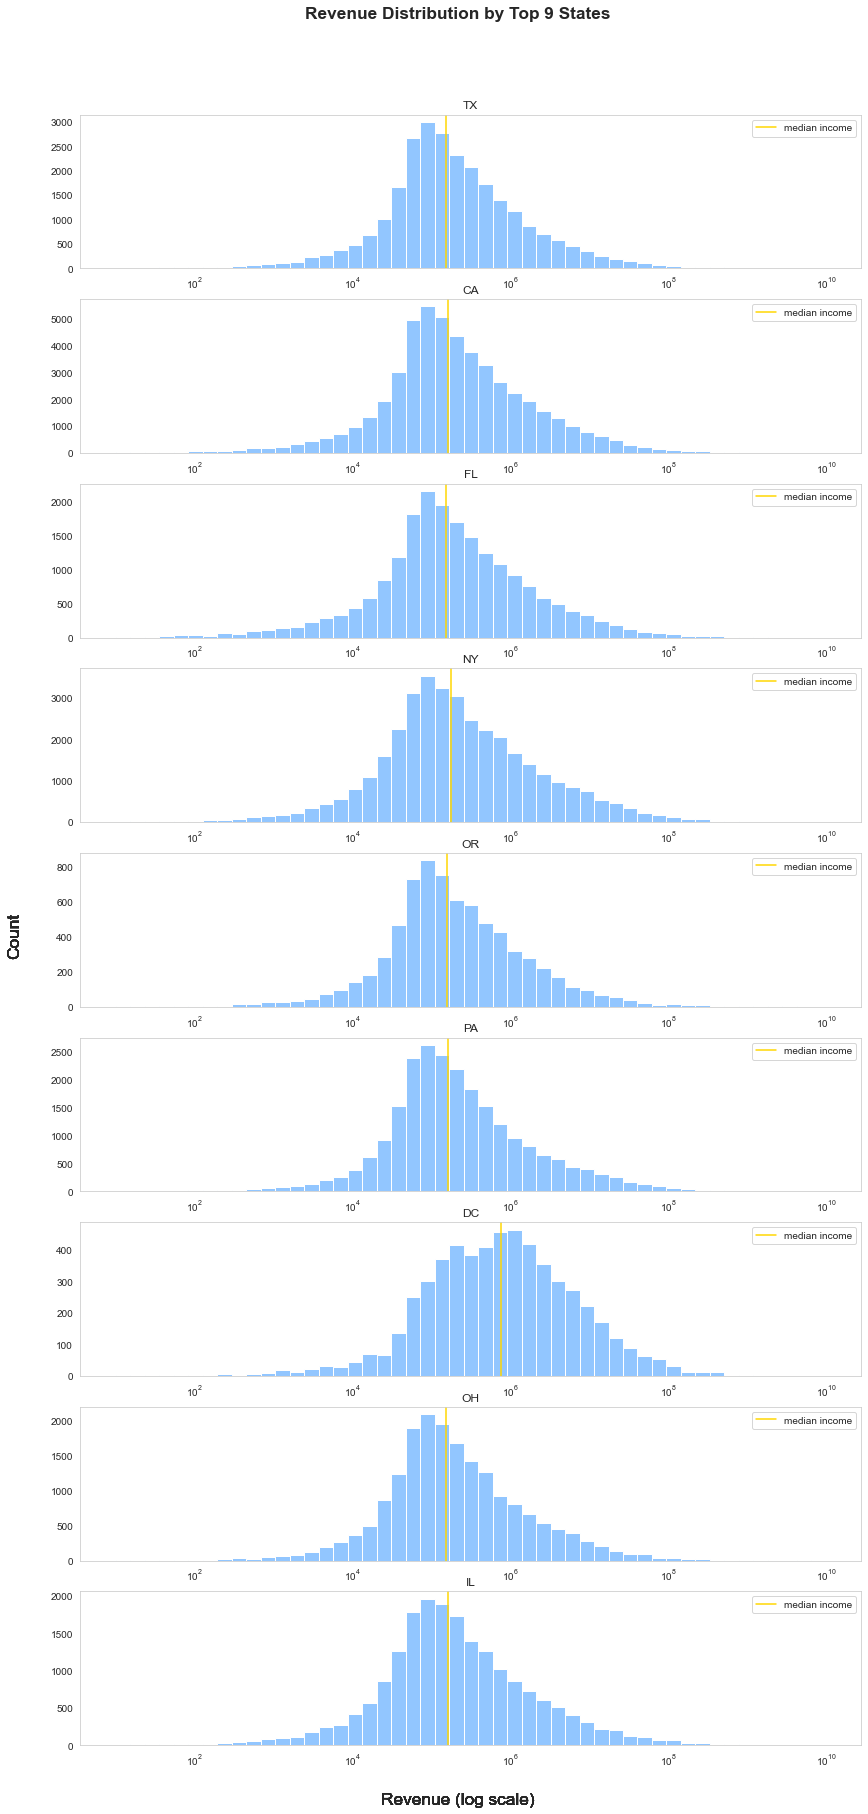

In [523]:
fig, axs = plt.subplots(9,1, figsize=(14,30))

test_state_lst = ['TX','CA','FL', 'NY', 'OR','PA','DC', 'OH','IL']

for i, axs in zip(test_state_lst, axs.flatten()):
    
    scale = np.logspace(1,10)
    
    state = df[df['STATE_x']==f'{i}']
    
    x = state[state['REVENUE_AMT'] > 0]['REVENUE_AMT'].sort_values(ascending=False)
    
    axs.hist(x,bins=scale)
    axs.axvline(x.median(), color='gold', label='median income')
    axs.set_title(f'{i}', size=12)
    axs.set_xscale('log')
    axs.grid()
    axs.legend()
    fig.tight_layout
    fig.suptitle('Revenue Distribution by Top 9 States', y=0.93,
                 size='xx-large', weight='bold',
                 stretch='expanded')
    fig.text(0.5, 0.1, 'Revenue (log scale)', ha='center', va='center',
             size='xx-large', stretch='semi-expanded')
    fig.text(0.06, 0.5, 'Count', ha='center', va='center',
             rotation='vertical', size='xx-large',
             stretch='semi-expanded')
    plt.savefig('../images/state_rev_hist.png')


In [522]:
x = state[state['REVENUE_AMT'] > 0]['REVENUE_AMT'].sort_values(ascending=False)
sta = state[state['REVENUE_AMT']>0]['REVENUE_AMT'].median()
# x = np.logspace(1,10)

# plt.figure(figsize=(12,6))
# plt.hist(sta, bins=x)
# plt.axvline(sta.median(), color='gold', label='median revenues')
# # plt.xlim(10,)
# plt.xscale('log')
# plt.title('NONPROFIT REVENUE DISTRIBUTION in 2019')
# plt.ylabel('COUNT')
# plt.xlabel('REVENUES (log scale)')
# plt.legend()
# plt.grid()
# plt.show()
# # plt.savefig('../images/np_rev_dist.png')
sta

163029.0

## stats analysis

In [574]:
# eda_df.info()

In [558]:
a = eda_df[eda_df['avg_income'] < eda_df['avg_income'].mean()]['REVENUE_AMT']
b = eda_df[eda_df['avg_income'] >= eda_df['avg_income'].mean()]['REVENUE_AMT']
a2 = a[a>0]
b2 = b[b>0]
# ttest, pvalue = stats.ttest_ind(a,b)

a2
ttest, pvalue = stats.ttest_ind(a2,b)
round(pvalue,4)


0.0001

In [19]:
stat_df = eda_df[['avg_income', 'REVENUE_AMT']]

In [186]:
# clean_teststat_df[stat_df['REVENUE_AMT']>0]

In [546]:
import scipy.stats as stats

#eda_df['avg_income'].mean()

a = eda_df[eda_df['avg_income'] < us_median]['REVENUE_AMT'].values
b = eda_df[eda_df['avg_income'] >= us_median]['REVENUE_AMT'].values

ttest, pvalue = stats.ttest_ind(a,b)

a

array([ 154543., 6823299.,       0., ...,  225000.,       0.,       0.])

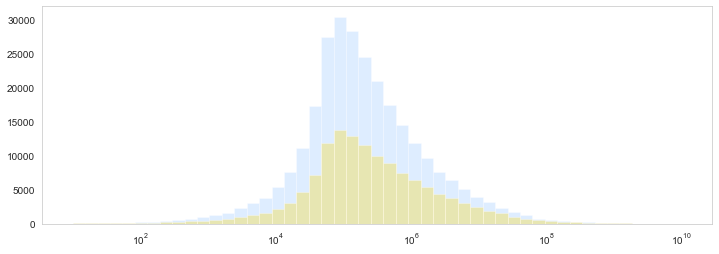

<Figure size 432x288 with 0 Axes>

In [619]:
x = np.logspace(1,10)

plt.figure(figsize=(12,4))
plt.xscale('log')
plt.hist(a2, bins=x, alpha=.3)
plt.hist(b2, bins=x, alpha=.3, color='gold')
plt.grid()
plt.show()
plt.savefig('../images/np_rev_dist.png');

#the probability of observing revenues above the median based on income is nearly 0. 

#the probability of observing revenues above the mean based on income is nearly 0 as well. 
#as the threshold 

In [661]:
a2.mean(), b2.mean()

(4487658.034382278, 7213329.021609022)

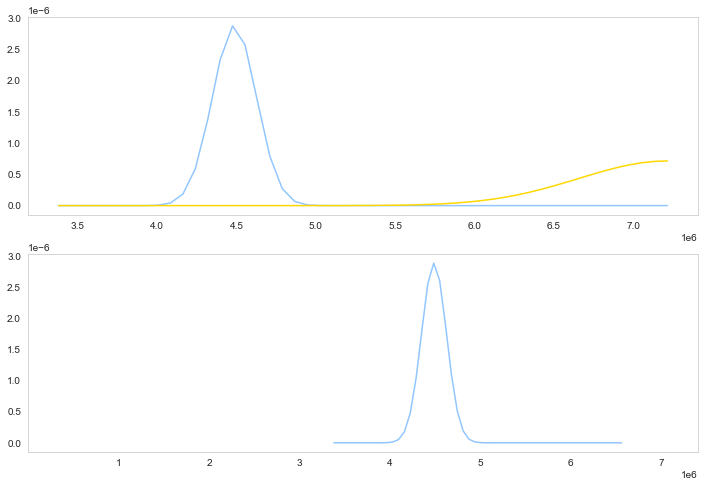

In [668]:
# Plot the distributions of the samples and compare
a = eda_df[eda_df['avg_income'] < eda_df['avg_income'].mean()]['REVENUE_AMT']
b = eda_df[eda_df['avg_income'] >= eda_df['avg_income'].mean()]['REVENUE_AMT']
a2 = a[a>0]
b2 = b[b>0]

min_x = a2.mean() - (a2.std()/(len(a2)**.5)*8)
max_x = a2.mean() + (a2.std()/(len(a2)**.5)*15)

min_y = b2.mean() - (b2.std()/(len(b2)**5)*8)
max_y = b2.mean() + (b2.std()/(len(b2)**5)*)

x = np.linspace(min_x,max_x)
y = np.linspace(min_y,max_y)
z = np.linspace(min(min_x, min_y), max(max_x, max_y))

one = stats.norm(loc=np.mean(a2), scale=np.std(a2)/(len(a2)**.5))
two = stats.norm(loc=np.mean(b2), scale=np.std(b2)/(len(b2)**.5))

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

ax1.plot(z, one.pdf(z))
ax1.plot(z, two.pdf(z), color='gold')


ax2.plot(x, one.pdf(x))
ax2.plot(y, two.pdf(y),color='gold')
ax2.set_xlim(5)
ax1.grid()
ax2.grid()

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax2 = ax1.twinx()

ax1.bar(df.index, y1,label='Count')
ax1.set_xticklabels(df.index, rotation=90)
ax1.set_xlabel(f'{xlabel}', size=12)
ax1.set_ylabel(f'{y1label}', size=12)
ax1.set_title(f'{title}', size=15)
ax1.grid()

ax2.bar(df.index, y2, color='gold', alpha=.3, width=.5, align='center', label='Revenues')
ax2.set_ylabel(f'{y2label}')
ax2.grid()
fig.legend()
plt.savefig(f'../images/{filename}.png')

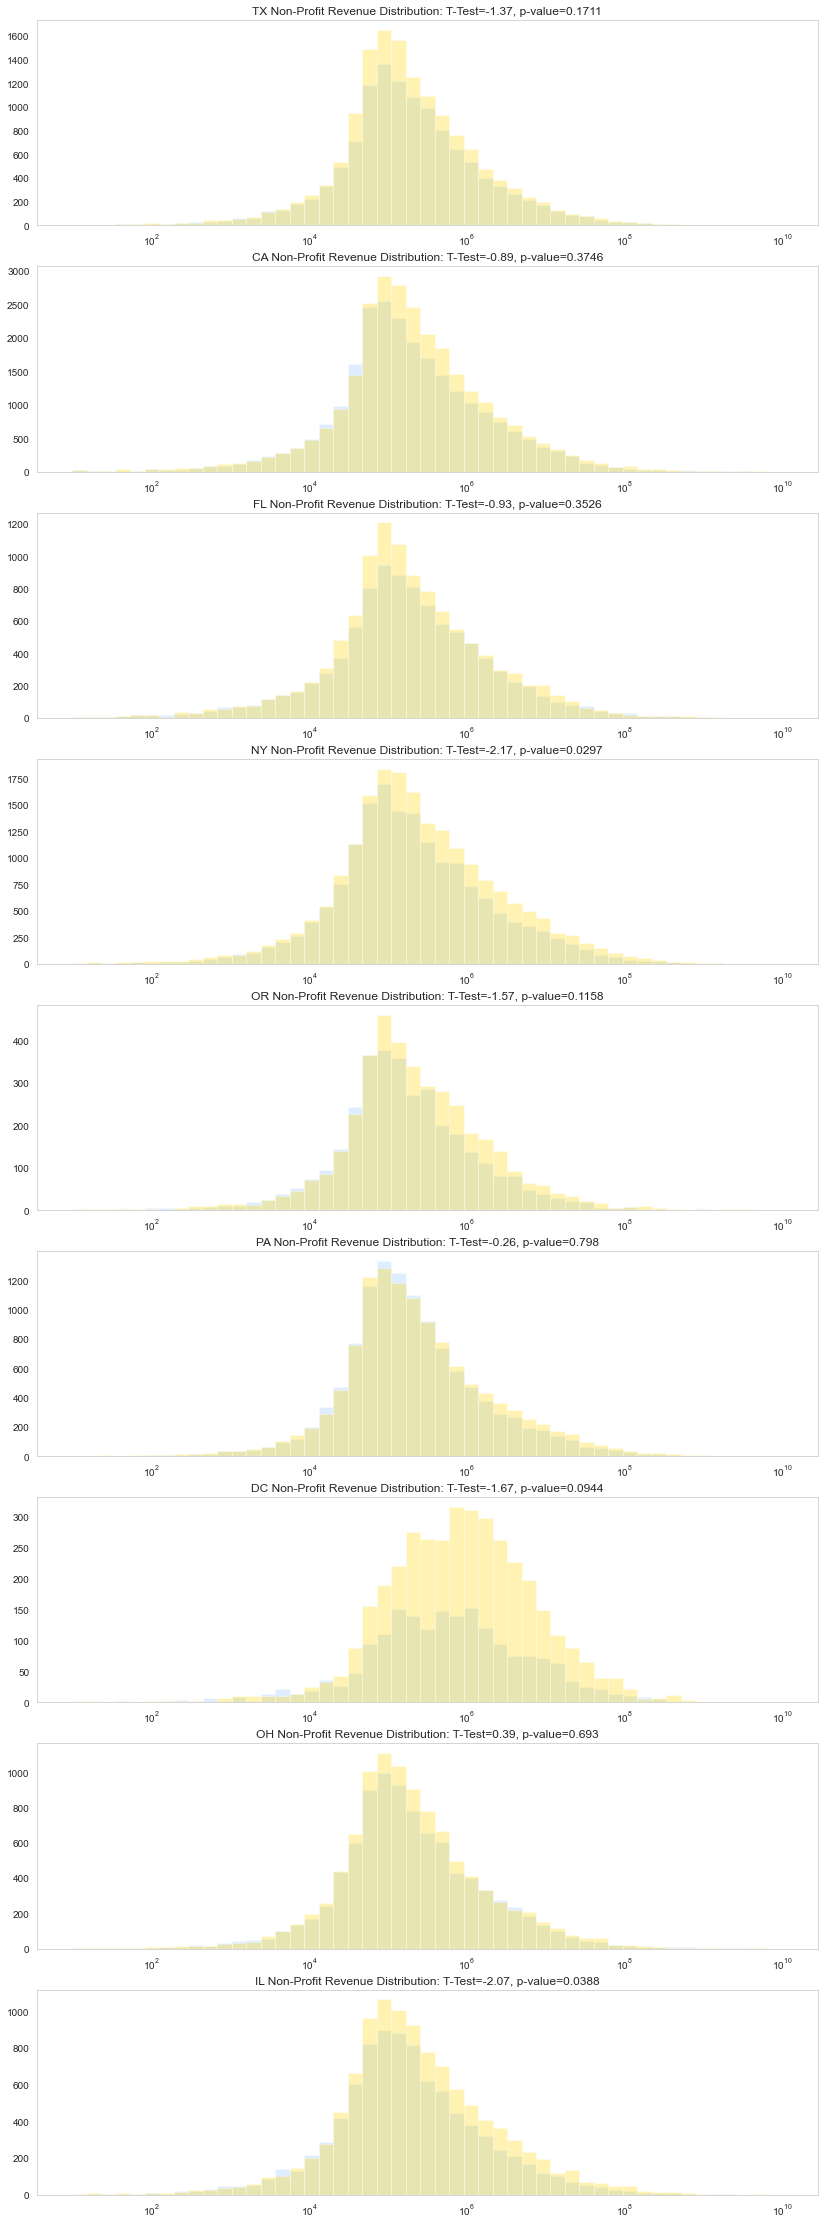

In [626]:
fig, axs = plt.subplots(9,, figsize=(14,40))

test_state_lst = ['TX','CA','FL', 'NY', 'OR','PA','DC', 'OH','IL']

for i, axs in zip(test_state_lst, axs.flatten()):
    
    state = df[df['STATE_x']==f'{i}']

    a = state[state['avg_income'] < state['avg_income'].median()]['REVENUE_AMT']
    b = state[state['avg_income'] >= state['avg_income'].median()]['REVENUE_AMT']
    
    a2 = a[a>0]
    b2 = b[b>0]
    
    ttest, pvalue = stats.ttest_ind(a2,b2)
    
    x = np.logspace(1,10)

    axs.hist(a2, bins=x, alpha=.3)
    axs.hist(b2, bins=x, alpha=.3, color='gold')
    axs.set_title(f'{i} Non-Profit Revenue Distribution: T-Test={round(ttest,2)}, p-value={round(pvalue,4)}')
    axs.set_xscale('log')
    axs.grid()
    
    fig.tight_layout


In [593]:
state = df[df['STATE_x']=='DC']

a = state[state['avg_income'] < state['avg_income'].median()]['REVENUE_AMT']
b = state[state['avg_income'] >= state['avg_income'].median()]['REVENUE_AMT']

a2 = a[a>0]
b2 = b[b>0]

ttest, pvalue = stats.ttest_ind(a2,b2)

ttest, pvalue

(-1.673066163221302, 0.09436945626190285)

In [605]:
test_state_lst = ['TX','CA','FL', 'NY', 'OR','PA','DC', 'OH','IL']

for i in test_state_lst:
    
    state = df[df['STATE_x']==f'{i}']

    a = state[state['avg_income'] < state['avg_income'].median()]['REVENUE_AMT']
    b = state[state['avg_income'] >= state['avg_income'].median()]['REVENUE_AMT']
    
    a2 = a[a>0]
    b2 = b[b>0]
    
    med = state['REVENUE_AMT'].mean()
    stda2 = a2.std()
    meda2 = a2.mean()
    ttest, pvalue = stats.ttest_ind(a2,b2)
    
    print(med, stda2, meda2, ttest, pvalue)
    
    

1508565.1557503117 37548859.50691115 3759416.8793883086 -1.3685869426809103 0.17114001592753392
2268906.3879725914 61350735.40736132 4618725.04069066 -0.8878613970364524 0.3746194924400381
1805815.0348154835 55139540.9017606 4278952.978292786 -0.9295721133696722 0.3526036487367675
3792798.0297577856 82831915.76492898 6031995.480538031 -2.1743575226090135 0.029684659074583928
7480436.453108719 25075375.375221662 2407148.3980986336 -1.5729233581909239 0.11577984902068493
2742116.147975016 148444284.488057 5635437.407621346 -0.25588887821858247 0.7980388690155529
4665371.117766292 33994633.32675445 6395751.564986737 -1.673066163221302 0.09436945626190285
2229825.598478495 97362065.39972211 6178996.214027397 0.3948279071475477 0.6929742977868275
2323869.1621644506 60426983.96666801 4286295.151319453 -2.066960780935632 0.038750859362499744


<bound method Figure.tight_layout of <Figure size 1008x1440 with 4 Axes>>

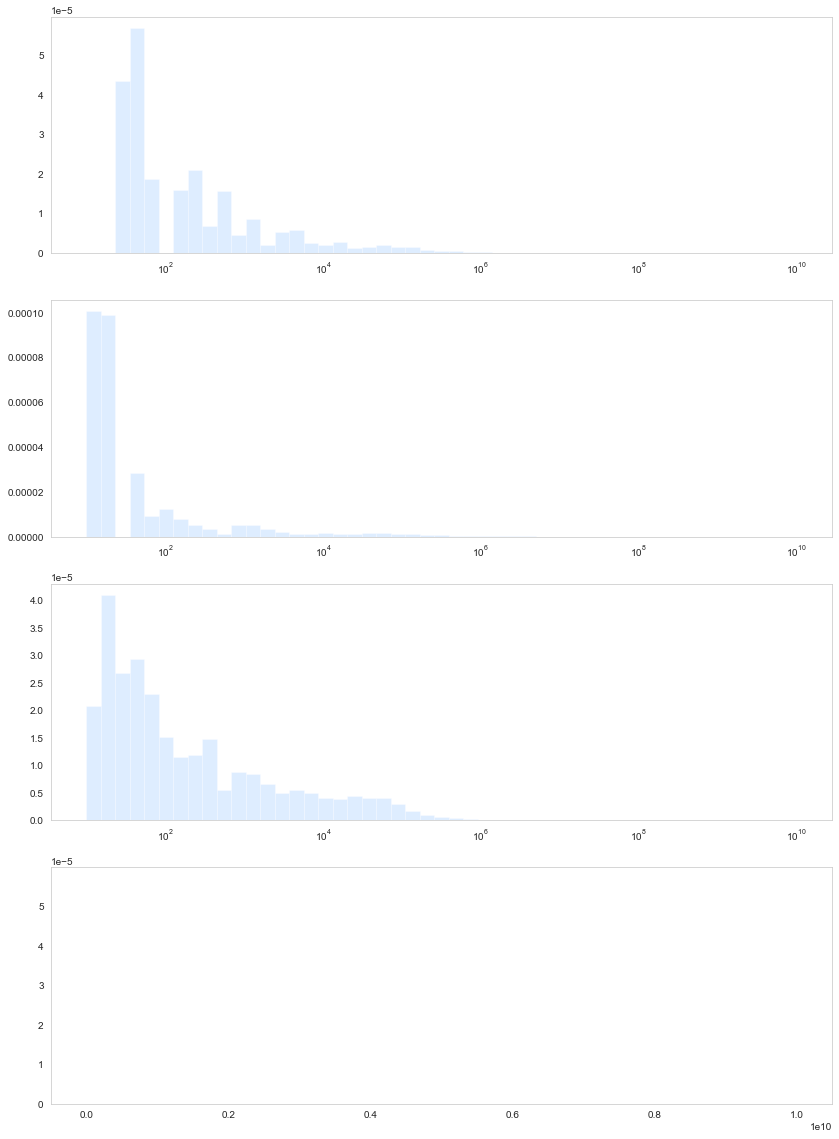

In [658]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(14,20))

test_state_lst = ['DC', 'OH']

    
state = df[df['STATE_x']== 'DC']

a = state[state['avg_income'] < state['avg_income'].median()]['REVENUE_AMT']
b = state[state['avg_income'] >= state['avg_income'].median()]['REVENUE_AMT']

a2 = a[a>0]
b2 = b[b>0]

ttest, pvalue = stats.ttest_ind(a2,b2)

x = np.logspace(1,10)

ax1.hist(a2, bins=x, alpha=.3, density=True)
ax1.set_xscale('log')
ax1.grid()

ax2.hist(b2, bins=x, alpha=.3, density=True)
ax2.set_xscale('log')
ax2.grid()


state = df[df['STATE_x']== 'OH']

a = state[state['avg_income'] < state['avg_income'].median()]['REVENUE_AMT']
b = state[state['avg_income'] >= state['avg_income'].median()]['REVENUE_AMT']

a2 = a[a>0]
b2 = b[b>0]

ttest, pvalue = stats.ttest_ind(a2,b2)

x = np.logspace(1,10)

ax3.hist(a2, bins=x, alpha=.3, density=True)
ax3.set_xscale('log')
ax3.grid()

ax4.hist(b2, bins=x, alpha=.3, density=True)
ax4.set_xscale('log')
ax4.grid()
fig.tight_layout

In [669]:
df

,STATE_x,FOUNDATION,SUBSECTION,REVENUE_AMT,avg_income,zipcode
0,AK,15,3,154543,75.148579,99501
1,AK,15,3,6823299,75.148579,99501
2,AK,15,3,0,75.148579,99501
3,AK,0,5,883302,75.148579,99501
4,AK,15,3,0,75.148579,99501
...,...,...,...,...,...,...
1017126,WY,16,3,0,94.558947,83128
1017127,WY,0,19,0,94.558947,83128
1017128,WY,15,3,225000,94.558947,83128
1017129,WY,16,3,0,94.558947,83128


In [680]:
subsection = df[df.SUBSECTION == 3]
subsection

,STATE_x,FOUNDATION,SUBSECTION,REVENUE_AMT,avg_income,zipcode
0,AK,15,3,154543,75.148579,99501
1,AK,15,3,6823299,75.148579,99501
2,AK,15,3,0,75.148579,99501
4,AK,15,3,0,75.148579,99501
6,AK,15,3,1022511,75.148579,99501
...,...,...,...,...,...,...
1017125,WY,15,3,98023,94.558947,83128
1017126,WY,16,3,0,94.558947,83128
1017128,WY,15,3,225000,94.558947,83128
1017129,WY,16,3,0,94.558947,83128


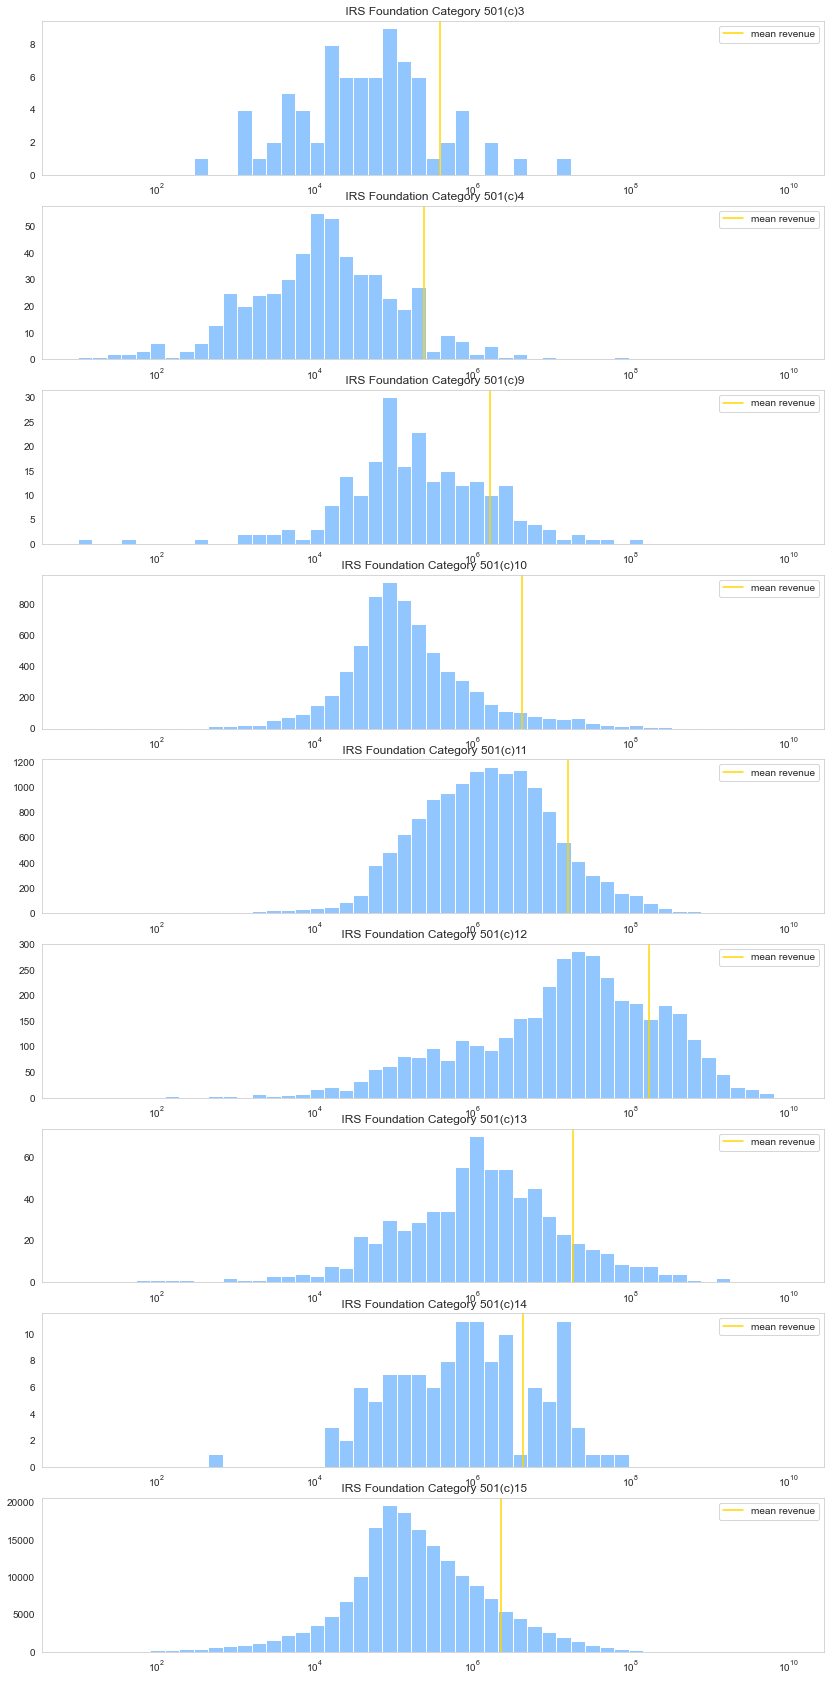

In [685]:
fig, axs = plt.subplots(9,1, figsize=(14,30))

test_sub_lst = [3,4,9,10,11,12,13,14,15,17,18]

for i, axs in zip(test_sub_lst, axs.flatten()):
    
    scale = np.logspace(1,10)
    
    foundation = subsection[subsection['FOUNDATION']==i]
    
    x = foundation[foundation['REVENUE_AMT'] > 0]['REVENUE_AMT'].sort_values(ascending=False)
    
    axs.hist(x,bins=scale)
    axs.axvline(x.mean(), color='gold', label='mean revenue')
    axs.set_title(f' IRS Foundation Category 501(c){i}', size=12)
    axs.set_xscale('log')
    axs.grid()
    axs.legend()
    fig.tight_layout
#     fig.suptitle('Revenue Distribution by Top 9 States', y=0.93,
#                  size='xx-large', weight='bold',
#                  stretch='expanded')
#     fig.text(0.5, 0.1, 'Revenue (log scale)', ha='center', va='center',
#              size='xx-large', stretch='semi-expanded')
#     fig.text(0.06, 0.5, 'Count', ha='center', va='center',
#              rotation='vertical', size='xx-large',
#              stretch='semi-expanded')
#     plt.savefig('../images/state_rev_hist.png')